# Inversa generalizada de Moore-Penrose

Existen varias formas de calcular la inversa generalizada de Moore-Penrose de una matriz. Aquí expondremos algunas de ellas usando diversas librerías de `sympy`.

## Cálculo a partir de una descomposición en valores singulares

Si $A$ es una matriz con entradas reales y $UDV^t$ es una descomposición en valores singulares corta de $A$, entonces por la demostración del Teorema VI.2.2 de [I. Ojeda, J. Gago, [Métodos matemáticos para la Estadística](https://publicauex.unex.es/libro/metodos-matematicos-para-estadistica_135467/)] la inversa generalizada de Moore-Penrose de $A$ es $A^\dagger=VD^{-1}U^t$.

Ilustremos este cálculo usando los Ejemplos VI.1.8 y VI.2.3 de [I. Ojeda, J. Gago, [Métodos matemáticos para la Estadística](https://publicauex.unex.es/libro/metodos-matematicos-para-estadistica_135467/)].


Vamos a utilizar `singular_value_decomposition` que apareció en la versión 1.8 de `sympy`. Si nuestra versión es anterior, podemos ejecutar `pip install "sympy>=1.8"` (luego tenemos que reiniciar el núcleo).

In [1]:
from sympy import Matrix,eye

In [2]:
A=Matrix([(2,0,1),(3,-1,1),(-2,4,1),(1,1,1)])
A

Matrix([
[ 2,  0, 1],
[ 3, -1, 1],
[-2,  4, 1],
[ 1,  1, 1]])

Para calcular la inversa generalizada de Moore-Penrose usamos `pinv`.

In [3]:
A.pinv()

Matrix([
[5/42, 13/84, -1/42, 1/12],
[1/21,  1/84,  4/21, 1/12],
[1/12,  1/12,  1/12, 1/12]])

#### Usando `svd`

Como hemos visto, para calcular la descomposición en valores singulares, podemos utilizar `svd`.

In [4]:
U,D,V=A.singular_value_decomposition()
U

Matrix([
[1/2,  -sqrt(14)/14],
[1/2,   -sqrt(14)/7],
[1/2, 3*sqrt(14)/14],
[1/2,             0]])

In [5]:
D

Matrix([
[2*sqrt(3),         0],
[        0, 2*sqrt(7)]])

In [6]:
V

Matrix([
[sqrt(3)/3, -sqrt(2)/2],
[sqrt(3)/3,  sqrt(2)/2],
[sqrt(3)/3,          0]])

In [7]:
igA=V*D.inv()*U.T
igA

Matrix([
[5/42, 13/84, -1/42, 1/12],
[1/21,  1/84,  4/21, 1/12],
[1/12,  1/12,  1/12, 1/12]])

Veamos que verifica las condiciones de inversa generalizada.

$AA^\dagger A=A$:

In [8]:
A*igA*A==A

True

$A^\dagger A A^\dagger=A^\dagger$:

In [9]:
igA*A*igA==igA

True

$A A^\dagger$ y $A^\dagger A$ son simétricas:

In [10]:
(A*igA).is_symmetric()

True

In [11]:
(igA*A).is_symmetric()

True

## Cálculo a partir de una factorización de rango pleno

Podemos calcular la inversa generalizada una vez que conozcamos una [factorización de rango pleno](https://es.wikipedia.org/wiki/Factorizaci%C3%B3n_de_rango) de la matriz. Ilustramos este proceso siguiendo los pasos que se explican en [L. Merino, E. Santos, [Álgebra Lineal con Métodos Elementales](https://www.amazon.es/%C3%81lgebra-lineal-m%C3%A9todos-elementales-GONZALEZ/dp/8497324811)].

In [12]:
E,F=A.rank_decomposition()
E

Matrix([
[ 2,  0],
[ 3, -1],
[-2,  4],
[ 1,  1]])

In [13]:
F

Matrix([
[1, 0, 1/2],
[0, 1, 1/2]])

In [14]:
E*F==A

True

El rango de `E` y de `F` coincide con el rango de `A`.

El siguiente paso es calcular una inversa por la derecha de `F` y una inversa por la izquierda de `E`. Al ser ambas de rango pleno for fillas y por columnas, respectivamente, esto se puede hacer de la siguiente forma.

In [15]:
FR=F.T*(F*F.T).inv()
FR

Matrix([
[ 5/6, -1/6],
[-1/6,  5/6],
[ 1/3,  1/3]])

In [16]:
F*FR

Matrix([
[1, 0],
[0, 1]])

In [17]:
EL=(E.T*E).inv()*E.T
EL

Matrix([
[9/56, 11/56,  1/56, 1/8],
[5/56,  3/56, 13/56, 1/8]])

In [18]:
EL*E

Matrix([
[1, 0],
[0, 1]])

In [19]:
igrpA=FR*EL
igrpA==A.pinv()

True

La descomposición de rango pleno también se puede hacer usando la forma normal reducida por filas.

In [20]:
frA=Matrix.hstack(A,eye(4)).rref(pivots=False)
frA

Matrix([
[1, 0, 1/2, 0, 0, -1/6,  2/3],
[0, 1, 1/2, 0, 0,  1/6,  1/3],
[0, 0,   0, 1, 0,  1/3, -4/3],
[0, 0,   0, 0, 1,  2/3, -5/3]])

In [21]:
Q=frA[:,3:]
H=frA[:,:3]
Q

Matrix([
[0, 0, -1/6,  2/3],
[0, 0,  1/6,  1/3],
[1, 0,  1/3, -4/3],
[0, 1,  2/3, -5/3]])

In [22]:
H

Matrix([
[1, 0, 1/2],
[0, 1, 1/2],
[0, 0,   0],
[0, 0,   0]])

Como $QA=H$, haciendo $Q^{-1}H$ recuperamos $A$. Como las dos últimas filas de $H$ son cero, sólo nos interesan las dos primeras filas $H$ y las dos primeras columnas de $Q^{-1}$.

In [23]:
Q.inv()*H

Matrix([
[ 2,  0, 1],
[ 3, -1, 1],
[-2,  4, 1],
[ 1,  1, 1]])

In [24]:
E==Q.inv()[:,:2]

True

In [25]:
F==H[:2,:]

True

## Soluciónes mínimo cuadráticas

Una de las aplicaciones de la inversa generalizada de Moore-Penrose es el cálculo de soluciones óptimas (o de norma mínima) minimo-cuadráticas de un sistema de ecuaciones. Si $Ax=b$ es un sistema de ecuaciones, entonces la solución óptima mínimo-cuadrática de ese sistema es $A^\dagger b$.

Ilustremos esta construcción con el Ejemplo 13 (Capítulo VII) de [L. Merino, E. Santos, [Álgebra Lineal con Métodos Elementales](https://www.amazon.es/%C3%81lgebra-lineal-m%C3%A9todos-elementales-GONZALEZ/dp/8497324811)].

### Ejemplo

Calcular una solución óptima mínimo-cuadrática del sistema $Ax=b$ con 
$$
A=\begin{pmatrix}
2 & 0 & 2 & 0 \\
1 & 1 & 2 & 1 \\
-1 & 3 & 2 & 3 
\end{pmatrix}
$$
y $b=(6,0,2)^t$.

In [26]:
A=Matrix([(2,0,2,0),(1,1,2,1),(-1,3,2,3)])
A

Matrix([
[ 2, 0, 2, 0],
[ 1, 1, 2, 1],
[-1, 3, 2, 3]])

In [27]:
b=Matrix([6,0,2])

In [28]:
igA=A.pinv()
igA

Matrix([
[  1/5, 1/10, -1/10],
[-3/70, 1/70,  9/70],
[11/70, 4/35,  1/35],
[-3/70, 1/70,  9/70]])

In [29]:
xo=igA*b
xo

Matrix([
[1],
[0],
[1],
[0]])

El sistema no es compatible, ya que $Ax\neq b$.

In [30]:
A*xo

Matrix([
[4],
[3],
[1]])

El siguiente ejemplo se corresponde con los Ejemplos 14 y 15 (Capítulo VII) de [L. Merino, E. Santos, [Álgebra Lineal con Métodos Elementales](https://www.amazon.es/%C3%81lgebra-lineal-m%C3%A9todos-elementales-GONZALEZ/dp/8497324811)].

### Ejemplo

La siguiente tabla muestra la estatura media de los niños de cero a cuatro semestres de vida

| x | 0 | 1 | 2 | 3 | 4 |
| :---| :--- | :--- | :--- | :--- | :---| 
| y | 50 | 66.5 | 75 | 81 | 86.5 |

Intentemos ajustar una recta $y=ax+b$. Idealmente, por los datos que tenemos
$$
\begin{array}{rcl}
b & =& 50,\\
a + b & =& 66.5,\\
2a+b &=& 75,\\
3a+b &=& 81,\\
4a+b &=& 86.5.
\end{array}
$$
Que podemos escribir en forma de matriz como 
$$
\begin{pmatrix}
0 & 1\\
1 & 1\\
2 & 1\\
3 & 1\\
4 & 1
\end{pmatrix} 
\begin{pmatrix}
a \\ b
\end{pmatrix}
= 
\begin{pmatrix}
50 \\ 66.5 \\ 75 \\ 81 \\ 86.5
\end{pmatrix}.
$$

In [31]:
A=Matrix([range(5),[1]*5]).T
A

Matrix([
[0, 1],
[1, 1],
[2, 1],
[3, 1],
[4, 1]])

In [32]:
alt=Matrix((50,66.5,75,81,86.5))
alt

Matrix([
[  50],
[66.5],
[  75],
[  81],
[86.5]])

In [33]:
igA=A.pinv()
igA

Matrix([
[-1/5, -1/10,   0, 1/10,  1/5],
[ 3/5,   2/5, 1/5,    0, -1/5]])

In [34]:
xo=igA*alt
xo

Matrix([
[8.75],
[54.3]])

In [35]:
a,b = tuple(xo)

Así nuestra recta de aproximación es $y=8.75x+54.3$.

In [36]:
from matplotlib import pyplot

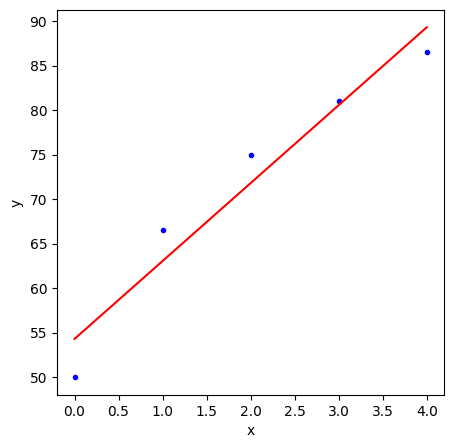

In [37]:
pyplot.figure(figsize = (5,5))
x=range(5)
y=alt.T.tolist()[0]
r=[a*t+b for t in x]
pyplot.plot(x, y, 'b.')
pyplot.plot(x, r, 'r')
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()

### Ejemplo

Supongamos que en nuestro problema de edades y alturas queremos ajustar $y$ por un polinomio de grado dos en $x$, $y=ax^2+bx+c$. Evaluando ese polinomio en los valores que conocemos en $x$ y en $y$, obtenemos 
$$
\begin{pmatrix}
0 & 0 & 1\\
1 & 1 & 1\\
4 & 2 & 1\\
9 & 3 & 1\\
16 & 4 & 1
\end{pmatrix} 
\begin{pmatrix}
a \\ b \\ c
\end{pmatrix}
= 
\begin{pmatrix}
50 \\ 66.5 \\ 75 \\ 81 \\ 86.5
\end{pmatrix}.
$$

In [38]:
A=Matrix([[i**2 for i in range(5)],range(5),[1]*5]).T
A

Matrix([
[ 0, 0, 1],
[ 1, 1, 1],
[ 4, 2, 1],
[ 9, 3, 1],
[16, 4, 1]])

In [39]:
igA=A.pinv()
igA

Matrix([
[   1/7, -1/14,  -1/7, -1/14,    1/7],
[-27/35, 13/70,   4/7, 27/70, -13/35],
[ 31/35,  9/35, -3/35,  -1/7,   3/35]])

In [40]:
xo=igA*alt
xo

Matrix([
[-1.75],
[15.75],
[ 50.8]])

In [41]:
a,b,c=tuple(xo)

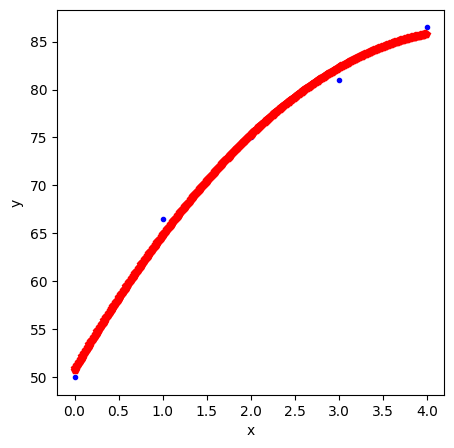

In [42]:
pyplot.figure(figsize = (5,5))
x=range(5)
y=alt.T.tolist()[0]
xp=[i/100 for i in range(400)]
p=[a*t**2+b*t+c for t in xp]
pyplot.plot(x, y, 'b.')
pyplot.plot(xp, p, 'p',c="r",linewidth=0.1)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()

En nuestros dos últimos ejemplos, $A$ es de rango pleno por columnas, por lo que la solución minimo-cuadrática podríamos haberla calculado con $A^L=(A^tA)^{-1}A^t$ (inversa a la izquierda de $A$).

In [43]:
AL=(A.T*A).inv()*A.T
AL

Matrix([
[   1/7, -1/14,  -1/7, -1/14,    1/7],
[-27/35, 13/70,   4/7, 27/70, -13/35],
[ 31/35,  9/35, -3/35,  -1/7,   3/35]])

In [44]:
AL==igA

True